<a href="https://colab.research.google.com/github/m-Ash1/object-detection-using-CNN/blob/master/machine_vision.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import os
import cv2
import numpy as np
import tensorflow
import matplotlib.pyplot as plt
from keras import Sequential
from keras.layers.convolutional import Convolution2D, MaxPooling2D
from keras.layers.core import Dense, Dropout, Activation, Flatten
from keras.utils import np_utils
from sklearn.model_selection import train_test_split
from google.colab.patches import cv2_imshow

In [ ]:
# Define data path
data_path = 'drive/MyDrive/dataset'
data_dir_list = os.listdir(data_path)
data_dir_list

['pen', 'book']

In [ ]:
num_classes = 2
img_data_list = []
label_list = []
for dataset in data_dir_list:
    img_list = os.listdir(data_path + '/' + dataset)
    class_num = data_dir_list.index(dataset)
    for img in img_list:
        input_img = cv2.imread(data_path + '/' + dataset + '/' + img)
        input_img_resize = cv2.resize(input_img, (128 , 128))
        img_data_list.append(input_img_resize)
        label_list.append(class_num)
img_data = np.array(img_data_list)
img_data = img_data.astype('float32')
img_data /= 255

In [ ]:
# Design the CNN Sequential model
cnn_model = Sequential([
    Convolution2D(32,(3,3),padding ='same',activation='relu',input_shape = (128, 128,3)),
    Convolution2D(32,(3,3),activation='relu'),
    MaxPooling2D(pool_size=(2,2)) ,
    Dropout(0.5),
    Flatten(), 
    Dense(128,activation='relu'),
    Dropout(0.5),
    Dense(1,activation = 'sigmoid'),
    # Flatten()
])

cnn_model.compile(loss='binary_crossentropy', optimizer='adam', metrics=["accuracy"])
cnn_model.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_12 (Conv2D)          (None, 128, 128, 32)      896       
                                                                 
 conv2d_13 (Conv2D)          (None, 126, 126, 32)      9248      
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 63, 63, 32)       0         
 2D)                                                             
                                                                 
 dropout_14 (Dropout)        (None, 63, 63, 32)        0         
                                                                 
 flatten_7 (Flatten)         (None, 127008)            0         
                                                                 
 dense_16 (Dense)            (None, 128)               16257152  
                                                      

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(img_data, label_list, test_size=0.2, random_state=1)

48


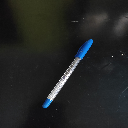

0
(48, 128, 128, 3)


In [ ]:
print(len(y_train))
cv2_imshow(X_train[2]*255)
print(y_train[2])
print(X_train.shape)

In [ ]:
hist = cnn_model.fit(X_train, np.array(y_train), epochs = 5, batch_size=1)
train_loss=hist.history['loss']

Epoch 1/5
48/48 [==============================] - 19s 385ms/step - loss: 0.9565 - accuracy: 0.8542
Epoch 2/5
48/48 [==============================] - 19s 397ms/step - loss: 0.1966 - accuracy: 0.8958
Epoch 3/5
48/48 [==============================] - 19s 407ms/step - loss: 0.0964 - accuracy: 0.9583
Epoch 4/5
48/48 [==============================] - 20s 402ms/step - loss: 0.0574 - accuracy: 0.9792
Epoch 5/5
48/48 [==============================] - 17s 350ms/step - loss: 0.0087 - accuracy: 1.0000


In [ ]:
score = cnn_model.evaluate(X_test, np.array(y_test))
print('Test Accuracy:', score[1])

1/1 [==============================] - 0s 175ms/step - loss: 0.0163 - accuracy: 1.0000
Test Accuracy: 1.0


1/1 [==============================] - 0s 211ms/step
Book :


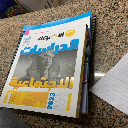

Book :


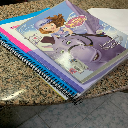

Pen :


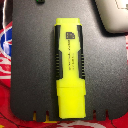

Book :


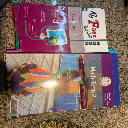

Book :


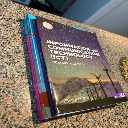

Book :


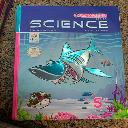

Book :


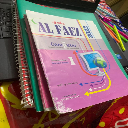

Book :


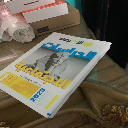

Book :


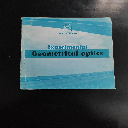

Pen :


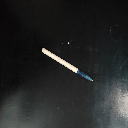

Pen :


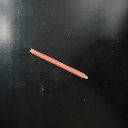

Book :


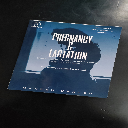

In [ ]:
# print(cnn_model.predict(X_test))
prediction = (cnn_model.predict(X_test) > 0.5).astype("int32")
for i in range(0,len(prediction)):
  print( "Book" if prediction[i] else "Pen",":")
  cv2_imshow(X_test[i]*255)